# Heterogeneous Agents - Solving the Aiyagari problem - OSE - Tony Smith 

## Jeanne Sorin

### Calibrate the transition probability

In [23]:
import numpy as np
from scipy.optimize import root
from matplotlib import pyplot as plt
from scipy.optimize import minimize


### This optimizer allows to put bounds on the choice variables
### Works
from scipy.optimize import minimize_scalar
from scipy import interpolate


In [24]:
# Define the employment status
ϵ = np.array((1.0, 0.0))

# Calibrate the transition probability
A = np.array([0.90, 0.1])
Trans= np.array([[0.90,0.10], [0.90, 0.10]] )
Ubar = 0.1
α = 0.36
β = 0.96
δ = 0.06


def rf(k, u):
    r = α*k**(α-1)*(1-u)**(1-α)
    return r
    
def wf(k, u):
    w = (1-α)*k**(α) * (1-u)**(-α)
    return w

# Define the FOC of the HH

def utility(c):
    U = 0
    if c > 0:
        U = np.log(c)
    if c <= 0:
        U = -99999999
    return U

def uprime(c):
    Up = -1/(c)
    return Up

'''
From the intertemporal EE, and the the definition of k and w as a function of k
'''

def find_K_SS(α, β, δ, u):
    k_ss = ((1/β - 1 + δ) / (α*(1 - u) **(1-α))) ** (1 / (α-1)) 
    return(k_ss)

Kss = find_K_SS(α, β, δ, Ubar)
Kss

    

6.4900587533395635

### Compute the steady state equilibrium value of aggregate capital kss*

#### 1. Guess on kss from the representative-agent economy in ss

In [25]:
def interpolant(x,Kgrid,Vp):
    t = interpolate.interp1d(Kgrid,Vp,fill_value="extrapolate")
    return t(x)


def Bellman(kp, *params):
    r, w, Kgrid, Vp, ϵ, ik, ie, Trans = params
    #print("Before U")
    today = utility(r*Kgrid[ik] + w*ϵ[ie] + (1-δ)*Kgrid[ik] - kp)
    #print("Computed utility ", today)
    
    fut = 0
    #print("Computing future")
    for i in range(Nϵ):
        #print("fut is ", fut)
        fut +=  Trans[ie,i]*interpolant(kp,Kgrid,Vp[:,i])  
        
    #print("Computed future ", fut)

    Value = today + β * fut
    #print("Computed total")
    
    
    
    return - Value



#### 2. Restrict k to lie on a grid of N = 200 points in the interval [0.001, 40] and then iterate on the Bellman equation to find v(k, e, kss) at each of the pairs in k*e

Use value function iteration for the policy function to know how k' depends on k.

In [26]:
n = 50
Nϵ = 2
tol = 1e-6
ϵ = np.array([1.,0.])
maxiter = 2000

# Make Grid


Klow = 0.01
Khigh = 40.

Kgrid = np.linspace(Klow, Khigh, n)


Vp = Klow*np.ones([n, Nϵ])
Kp= Klow*np.ones([n, Nϵ])
Vp_new = np.zeros([n, Nϵ])
Kp_new = np.zeros([n, Nϵ])



#### Run function

iter = 0
epsi = 1

r = rf(Kss, Ubar)
w = wf(Kss, Ubar) 

while (epsi > tol) & (iter < maxiter):
    
    
    for ik in range(n):
        
        for ie in range(Nϵ):
            
            params1 = r, w, Kgrid, Vp, ϵ, ik, ie, Trans
            #Solve = minimize(Bellman, Kp[ik, ie], args=(params1))
            Solve = minimize_scalar(Bellman, \
                      bounds=(Kgrid[ik]*0.00001,Kgrid[ik]*(1+r-δ)+w*ϵ[ie]), \
                      args=(params1), method='bounded' )
            Kp_new[ik, ie] = Solve.x
            Vp_new[ik, ie] = - Solve.fun
        

    iter += 1

    epsi = ((Vp_new - Vp) ** 2).sum()
    print("Error term: ", epsi)
    if epsi < tol:
        break
    #Update
    Kp = Kp_new*1.
    Vp = Vp_new*1.
    iter=iter+1

Kp_question2 = Kp
Vp_question2 = Vp

        

Error term:  879.9206881365067
Error term:  282.10788793270535
Error term:  159.78134424789255
Error term:  104.01410183006061
Error term:  72.98981522533434
Error term:  53.75034647946998
Error term:  40.96740030282338
Error term:  32.04730506002666
Error term:  25.58850016894375
Error term:  20.776749678106906
Error term:  17.09824892150246
Error term:  14.240737011879776
Error term:  11.97386206438963
Error term:  10.154913465166027
Error term:  8.679691021783114
Error term:  7.466896490735403
Error term:  6.458170555002146
Error term:  5.6146927649880825
Error term:  4.904866973480314
Error term:  4.302893539306708
Error term:  3.7894040755633918
Error term:  3.348366264807712
Error term:  2.967295588472313
Error term:  2.6363952506443478
Error term:  2.347778763258502
Error term:  2.0953210861445304
Error term:  1.8741791564376074
Error term:  1.6798510031926894
Error term:  1.508519007581009
Error term:  1.357004556426742
Error term:  1.2226421305021418
Error term:  1.10318419148

Policy Function [[7.00727866e-01 4.40344153e-06]
 [1.19536573e+00 2.47502452e-01]
 [1.88460980e+00 8.26124849e-01]
 [2.65143162e+00 1.59226784e+00]
 [3.44029977e+00 2.28151294e+00]
 [4.24015219e+00 3.04833469e+00]
 [5.04607876e+00 3.83720170e+00]
 [5.85563594e+00 4.63705408e+00]
 [6.66744187e+00 5.44298021e+00]
 [7.48068297e+00 6.25253660e+00]
 [8.29485487e+00 7.06434353e+00]
 [9.10963711e+00 7.87758485e+00]
 [9.92482139e+00 8.69175726e+00]
 [1.07402728e+01 9.50653841e+00]
 [1.15559067e+01 1.03217244e+01]
 [1.23716606e+01 1.11371755e+01]
 [1.31874946e+01 1.19528082e+01]
 [1.40033847e+01 1.27685615e+01]
 [1.48193150e+01 1.35843962e+01]
 [1.56352713e+01 1.44002890e+01]
 [1.64512467e+01 1.52162167e+01]
 [1.72672366e+01 1.60321729e+01]
 [1.80832373e+01 1.68481485e+01]
 [1.88992479e+01 1.76641386e+01]
 [1.97152615e+01 1.84801407e+01]
 [2.05312799e+01 1.92961485e+01]
 [2.13473061e+01 2.01121629e+01]
 [2.21633338e+01 2.09281837e+01]
 [2.29793666e+01 2.17442077e+01]
 [2.37954030e+01 2.25602364

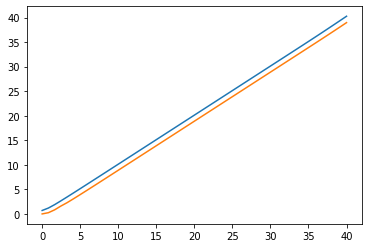

Value Function [[ 3.4095724  -1.80890418]
 [ 4.45270529  2.67026591]
 [ 5.28237136  3.98076162]
 [ 6.02075049  4.86250273]
 [ 6.71395031  5.6337939 ]
 [ 7.37603566  6.34803269]
 [ 8.01405831  7.025495  ]
 [ 8.63206444  7.67575251]
 [ 9.2326306   8.30409435]
 [ 9.8175239   8.91374923]
 [10.38803678  9.50685739]
 [10.94516711 10.08493568]
 [11.48972183 10.64912365]
 [12.02237884 11.20032135]
 [12.5437253  11.7392703 ]
 [13.05428194 12.26660289]
 [13.55451889 12.78287324]
 [14.04486633 13.28857719]
 [14.52572168 13.78416537]
 [14.99745475 14.27005206]
 [15.46041152 14.74662139]
 [15.9149169  15.21423176]
 [16.36127699 15.67321909]
 [16.79978081 16.12389933]
 [17.23070177 16.56657047]
 [17.65429896 17.00151414]
 [18.07081817 17.42899697]
 [18.48049289 17.84927176]
 [18.88354514 18.26257848]
 [19.28018622 18.6691452 ]
 [19.67061748 19.06918888]
 [20.0550309  19.46291614]
 [20.43360974 19.85052388]
 [20.80652918 20.23219998]
 [21.1739569  20.60812388]
 [21.53605391 20.9784672 ]
 [21.89297553

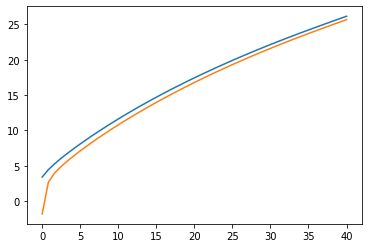

In [27]:
print("Policy Function",Kp_question2)
plt.plot(Kgrid, Kp_question2[:,0])
plt.plot(Kgrid, Kp_question2[:,1])
plt.show()
print("Value Function",Vp_question2)
plt.plot(Kgrid, Vp_question2[:,0])
plt.plot(Kgrid, Vp_question2[:,1])
plt.show()

In [28]:
### Simulation of the shock process for an individual

def simulation(kp, t_simu, trans, kss, kgrid):
    
    np.random.seed(seed=198)
    ϵ = np.random.binomial(1, trans[0, 1], t_simu)
    print("ϵ = ",ϵ)
    
    ksimu = np.ones([t_simu])
    ksimu[0] = kss*3
    
    for t in range(1, t_simu):
        ksimu[t] = interpolant(ksimu[t-1], kgrid, kp[:,ϵ[t]])
        if ksimu[t] < 0:
            ksimu[t] = 0
    
    print(ksimu)
            
    kss_new = np.mean(ksimu[1:])
    
    return kss_new


### Run the value function iteration with the simulation of t periods
epsi_simu = 1
iter_simu = 0
simuT = 100

Kss = find_K_SS(α, β, δ, Ubar)


while (epsi_simu > tol) & (iter_simu < maxiter):
    
    iter_simu += iter_simu
    print("Run for iter_simu = ", iter_simu)
    iter = 0
    epsi = 1

    r = rf(Kss, Ubar)
    w = wf(Kss, Ubar) 


    while (epsi > tol) & (iter < maxiter):


        for ik in range(n):

            for ie in range(Nϵ):

                params1 = r, w, Kgrid, Vp, ϵ, ik, ie, Trans
                Solve = minimize_scalar(Bellman, \
                      bounds=(Kgrid[ik]*0.00001,Kgrid[ik]*(1+r-δ)+w*ϵ[ie]), \
                      args=(params1), method='bounded' )                
                Kp_new[ik, ie] = Solve.x
                Vp_new[ik, ie] = - Solve.fun

        iter += 1

        epsi = ((Vp_new - Vp) ** 2).sum()
        #print("Error term: ", epsi)
        if epsi < tol:
            break
        #Update
        Kp = Kp_new*1.
        Vp = Vp_new*1.
        #iter=iter+1
        
    #print("Policy Function",Kp)
    #plt.plot(Kgrid, Kp[:,0])
    #plt.plot(Kgrid, Kp[:,1])
    #plt.show()
    #print("Value Function",Vp)
    #plt.plot(Kgrid, Vp[:,0])
    #plt.plot(Kgrid, Vp[:,1])
    #plt.show()
    
    # Simulation
    kss_n = simulation(Kp, simuT, Trans, Kss, Kgrid)
    print("New simulated kstar", kss_n)
    epsi_simu = (kss_n - Kss) **2
    print("error term for simulation for kss", epsi_simu)
    Kss = kss_n
    


Run for iter_simu =  0
ϵ =  [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[19.47017626 18.3533969  18.47188703 18.59036093 18.70881859 18.82726002
 17.71057549 17.82915679 17.9477204  18.06626632 18.1847958  18.30330903
 18.42180603 18.54028679 18.65875131 18.77719961 18.89563167 19.01404793
 19.1324484  19.25083307 19.36920196 19.48755506 19.60589238 19.72421396
 19.84252047 19.96081189 20.07908823 20.19734949 20.31559568 20.43382679
 20.55204302 20.67024531 20.78843366 20.90660807 21.02476855 21.14291508
 21.26104768 21.37916641 21.49727142 21.61536273 21.73344033 21.85150423
 21.96955443 22.08759092 22.20561398 22.32362407 22.4416212  21.32445096
 21.44256232 21.56065998 21.67874393 20.56166716 20.67986832 20.79805553
 20.91622881 21.03438815 21.15253355 21.27066501 21.38878262 21.50688652
 21.62497671 21.7430532  21.86111598 2

ϵ =  [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[85.85612359 74.54358883 66.48175027 59.21564394 52.66672823 46.76421386
 39.4074307  34.81365629 30.68871207 26.9371997  23.60036782 20.56556491
 17.89309255 15.46264542 13.34312847 11.51757906  9.88153127  8.45988731
  7.26480616  6.28793402  5.46198208  4.70305802  4.09801638  3.60014347
  3.20202151  2.89880776  2.71922511  2.61286474  2.5498713   2.51256255
  2.49046591  2.47737886  2.46962787  2.46503723  2.46231836  2.46070808
  2.45975436  2.45918951  2.45885497  2.45865683  2.45853948  2.45846998
  2.45842881  2.45840443  2.45839     2.45838144  2.45837638  0.82613206
  1.19879579  1.48365192  1.7013898   0.63756058  1.11268594  1.4178314
  1.65107801  1.82949578  1.96848187  2.07675097  2.16109177  2.22679262
  2.27797308  2.31784227  2.34890006  0.79885737  1.18633847  

ϵ =  [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[314.55217721 287.34428628 265.06704965 244.20352621 224.66400175
 206.36445529 186.01874362 170.17162482 155.33016401 141.43054214
 128.41299013 116.22153182 104.80374333  94.11052756  84.09590316
  74.71680671  65.93290761  57.70643466  50.0020136   42.78651501
  36.02891188  29.95921649  24.77265511  20.36701798  16.64171151
  13.50076451  10.99120844   8.93182864   7.30742284   6.01538497
   5.11682983   4.32575614   3.71810921   3.36862778   3.19512487
   3.08128748   2.9850397    2.90366367   2.83486149   2.77669029
   2.72750743   2.68592408   2.65076599   2.62104036   2.5959078
   2.5746586    2.55669273   0.82612352   1.63646864   2.17213121
   2.35931768   0.76956128   1.58233133   2.13634481   2.34693373
   2.41980843   2.44502686   2.45375375   2.45677371   2.45781877


ϵ =  [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[  16.17172143   17.05292896   19.20125899   21.4666529    23.85549326
   26.3745031    27.81167038   30.54625499   33.42984922   36.47057274
   39.67699155   43.05813065   46.62351069   50.38317109   54.34769836
   58.52825585   62.93661521   67.58518954   72.48706836   77.65605442
   83.10670261   88.85436092   94.91521366  101.30632705  108.04569724
  115.15230103  122.64614927  130.5483432   138.88113392  147.66798497
  156.93363847  166.70418473  177.00713577  187.87150273  199.32787761
  211.4085194   224.14744488  237.58052446  251.74558314  266.68250704
  282.4333557   299.04248052  316.55664966  335.02517968  354.50007447
  375.03617163  396.69129693  418.30732187  442.32032626  467.6418182
  494.34309821  521.28024681  550.90432709  582.14264686  615.08316732
  649.81864

ϵ =  [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[26.82833414 24.45986223 23.58069977 22.72779526 21.89919564 21.08307215
 18.88685222 18.1338119  17.40469085 16.69916735 16.01691963 15.35762077
 14.72093194 14.10651507 13.51419297 12.94361375 12.39438558 11.8662679
 11.35902548 10.87217098 10.40560288  9.9589149   9.53175607  9.12394395
  8.73496896  8.36472907  8.01271757  7.67865762  7.36235275  7.06285927
  6.78075387  6.51506139  6.26492821  6.03040719  5.8105239   5.60436471
  5.41272915  5.23573303  5.07225801  4.92127119  4.78181856  4.65302432
  4.53407442  4.42421642  4.32275536  4.22904945  4.14250591  2.72912242
  2.7421061   2.75478069  2.76715356  1.59642979  1.73505683  1.84990385
  1.94960044  2.03614522  2.11127315  2.17649033  2.23310417  2.2822496
  2.32491184  2.36194615  2.39409496  1.32292729  1.53042335  1

ϵ =  [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[19.98798598 18.7764566  18.81458631 18.85264239 18.89062509 18.92853457
 17.71910702 17.75931625 17.79944512 17.83949381 17.87946247 17.91935127
 17.95916035 17.99888988 18.03854143 18.07811538 18.11761187 18.15703106
 18.1963731  18.23563813 18.27482633 18.31393782 18.35297276 18.39193131
 18.43081361 18.46961981 18.50835006 18.5470045  18.5855833  18.62408659
 18.66251452 18.70086724 18.73914489 18.77734763 18.81547561 18.85352997
 18.89151096 18.92941873 18.96725341 19.00501514 19.04270408 19.08032035
 19.1178641  19.15533546 19.19273458 19.2300616  19.26731665 18.05721172
 18.09674912 18.13620914 18.17559193 16.96770281 17.00942362 17.05105873
 17.09260832 17.13407258 17.17545167 17.21674727 17.25796035 17.29909107
 17.3401396  17.38110611 17.42199076 16.21568695 16.2589604  

KeyboardInterrupt: 

Policy Function [[7.97468594e-01 4.23423908e-06]
 [1.15440576e+00 1.22279051e-01]
 [1.75398905e+00 8.26123262e-01]
 [2.45836909e+00 1.31050748e+00]
 [3.26025746e+00 1.91008957e+00]
 [3.96987504e+00 2.58506681e+00]
 [4.70776567e+00 3.29468462e+00]
 [5.45438722e+00 4.09061213e+00]
 [6.20875062e+00 4.86386849e+00]
 [6.96916798e+00 5.61048862e+00]
 [7.73390082e+00 6.36485224e+00]
 [8.50192734e+00 7.12527017e+00]
 [9.27258654e+00 7.89000040e+00]
 [1.00454083e+01 8.65802869e+00]
 [1.08200466e+01 9.42868920e+00]
 [1.15962335e+01 1.02015111e+01]
 [1.23737620e+01 1.09761486e+01]
 [1.31524663e+01 1.17523354e+01]
 [1.39322127e+01 1.25298639e+01]
 [1.47128837e+01 1.33085684e+01]
 [1.55163266e+01 1.40883132e+01]
 [1.63254230e+01 1.48689853e+01]
 [1.71063274e+01 1.56502318e+01]
 [1.78878370e+01 1.64311364e+01]
 [1.86703305e+01 1.72126470e+01]
 [1.94535570e+01 1.79951392e+01]
 [2.02374255e+01 1.87808164e+01]
 [2.10218951e+01 1.95969345e+01]
 [2.18068395e+01 2.03935291e+01]
 [2.25922112e+01 2.11779985

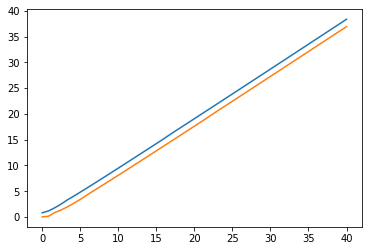

Value Function [[ 6.2558416   0.88946608]
 [ 7.07728206  5.3170332 ]
 [ 7.74183336  6.4588285 ]
 [ 8.32134458  7.20806959]
 [ 8.84712849  7.8513584 ]
 [ 9.3385125   8.42021967]
 [ 9.80628641  8.94210065]
 [10.25417995  9.42994917]
 [10.68508517  9.89317121]
 [11.10127923 10.33715446]
 [11.50450295 10.76480006]
 [11.89609974 11.17820979]
 [12.27714739 11.57899014]
 [12.64853439 11.96840419]
 [13.01100786 12.34747671]
 [13.3652062  12.71705862]
 [13.7116822  13.07786926]
 [14.05091988 13.43052589]
 [14.38334698 13.77556475]
 [14.70934463 14.11345659]
 [15.02922028 14.44461839]
 [15.34314273 14.76942235]
 [15.65139536 15.08819807]
 [15.95429264 15.40121074]
 [16.25210597 15.70863925]
 [16.54506913 16.01073798]
 [16.83339338 16.30777802]
 [17.11727396 16.59992009]
 [17.39688614 16.88735496]
 [17.67239102 17.17037606]
 [17.94394475 17.44916399]
 [18.21169365 17.72387709]
 [18.47577342 17.99467105]
 [18.73631106 18.26168931]
 [18.99342571 18.5250655 ]
 [19.24722929 18.78492485]
 [19.4978272 

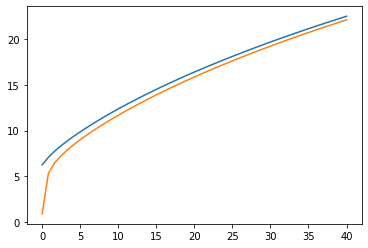

In [21]:
Kp_question3 = Kp
Vp_question3 = Vp

print("Policy Function",Kp_question3)
plt.plot(Kgrid, Kp_question3[:,0])
plt.plot(Kgrid, Kp_question3[:,1])
plt.show()
print("Value Function",Vp_question3)
plt.plot(Kgrid, Vp_question3[:,0])
plt.plot(Kgrid, Vp_question3[:,1])
plt.show()